In [23]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt

In [2]:
data=pd.read_csv(r"C:\Users\manir\Downloads\Data science class\Unsupervised\Mall_Customers_withNulls.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      199 non-null    float64
 4   Spending Score (1-100)  199 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        1
Spending Score (1-100)    1
dtype: int64

### Data cleaning

In [7]:
data.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_score'}, inplace=True)

In [8]:
# dropping the customer id column

data.drop(['CustomerID'], axis=1, inplace=True)

In [9]:
data.head()

,Gender,Age,Annual_Income,Spending_score
0,Male,19,15.0,39.0
1,Male,21,15.0,81.0
2,Female,20,16.0,6.0
3,Female,23,16.0,77.0
4,Female,31,17.0,40.0


In [11]:
# filling the null value with mean value

x=data['Annual_Income'].mean()
data['Annual_Income'].fillna(x, inplace=True)

data['Spending_score'].fillna(data['Spending_score'].mean(), inplace=True)

In [12]:
# converting the categorical column into numerical

le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [13]:
data.head()

,Gender,Age,Annual_Income,Spending_score
0,1,19,15.0,39.0
1,1,21,15.0,81.0
2,0,20,16.0,6.0
3,0,23,16.0,77.0
4,0,31,17.0,40.0


In [14]:
#applying the standardization techique
cols=data.columns

scaler=StandardScaler()
df=scaler.fit_transform(data)

In [15]:
cols

Index(['Gender', 'Age', 'Annual_Income', 'Spending_score'], dtype='object')

In [16]:
df1=pd.DataFrame(df, columns=cols)

In [17]:
df1.head()

,Gender,Age,Annual_Income,Spending_score
0,1.128152,-1.424569,-1.739314,-0.434456
1,1.128152,-1.281035,-1.739314,1.196070
2,-0.886405,-1.352802,-1.701144,-1.715583
3,-0.886405,-1.137502,-1.701144,1.040782
4,-0.886405,-0.563369,-1.662974,-0.395634


### scree plot

In [18]:
from sklearn.cluster import KMeans
TWSS=[]

k= list(range(2,8))

for i in k:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df1)
    TWSS.append(kmean.inertia_)         

In [20]:
print(TWSS, k)

[588.7015319891441, 476.7786288254691, 386.62139074726656, 325.66480489709716, 274.64560322720325, 235.62659306335993] [2, 3, 4, 5, 6, 7]


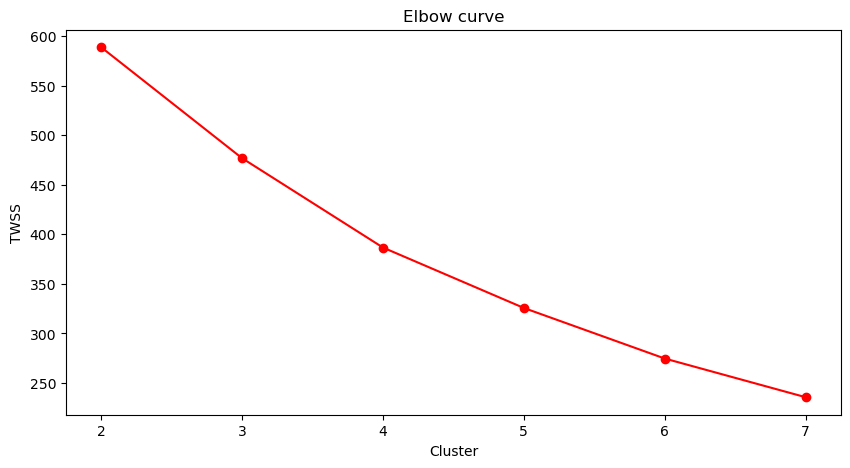

In [25]:
plt.figure(figsize=(10,5))
plt.title('Elbow curve')
plt.xlabel('Cluster')
plt.ylabel('TWSS')
plt.plot(k, TWSS, 'ro-')

### MOdel fit

In [26]:
cluster=KMeans(n_clusters=6)
res=cluster.fit(df1)

In [28]:
res.labels_

array([5, 5, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 5, 0, 5, 3, 0, 3, 5,
       1, 5, 1, 5, 1, 5, 1, 0, 3, 0, 3, 5, 1, 0, 1, 0, 1, 0, 1, 5, 3, 0,
       1, 0, 1, 0, 0, 0, 1, 5, 0, 3, 1, 3, 1, 3, 0, 3, 3, 5, 1, 1, 3, 5,
       1, 1, 5, 0, 3, 1, 1, 1, 3, 5, 1, 5, 0, 1, 3, 5, 3, 1, 0, 3, 1, 0,
       0, 1, 1, 5, 3, 1, 0, 5, 1, 0, 3, 5, 0, 1, 3, 5, 3, 0, 1, 3, 3, 3,
       3, 0, 1, 5, 0, 0, 1, 1, 1, 1, 5, 1, 1, 5, 0, 2, 4, 5, 3, 5, 4, 5,
       0, 2, 4, 2, 1, 5, 4, 2, 1, 5, 0, 2, 4, 5, 4, 2, 4, 5, 4, 5, 1, 2,
       1, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 5, 4, 5, 4, 5, 4, 2,
       4, 5, 4, 5, 4, 2, 4, 2, 4, 5, 4, 5, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [32]:
res.cluster_centers_

array([[-0.88640526, -0.92608124, -0.70047721,  0.28217816],
       [-0.88640526,  0.8165092 , -0.34698482, -0.45987443],
       [-0.71122636, -0.48536124,  1.12341879,  1.21126113],
       [ 1.12815215,  1.31794399, -0.52606053, -0.44554767],
       [ 0.43347718,  0.06273399,  1.15500756, -1.26444404],
       [ 1.12815215, -0.74922584, -0.08767096,  0.79689972]])

In [29]:
mall=pd.read_csv(r'C:\Users\manir\Downloads\Data science class\Unsupervised\Mall_Customers_withNulls.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0


In [30]:
clus=pd.Series(res.labels_)
mall['Cluster']=clus

In [31]:
mall.groupby('Cluster').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,58.891892,25.945946,42.216216,57.459459
1,79.545455,50.227273,51.477273,38.069767
2,166.434783,32.086957,90.000000,81.391304
3,67.821429,57.214286,46.785714,38.714286
4,168.241379,39.724138,90.827586,17.620690
5,97.820513,28.410256,58.210526,70.717949


In [ ]:
mall.to_csv('Mall.csv', encoding='utf-8')